Loan Eligibility Prediction Using ML

In [356]:
import pandas as pd

In [357]:
data = pd.read_csv('loan_prediction.csv')

### COLUMN DETAILS

###### Loan_ID : Unique Loan ID

###### Gender : Male/ Female

###### Married : Applicant married (Y/N)

###### Dependents : Number of dependents

###### Education : Applicant Education (Graduate/ Under Graduate)

###### Self_Employed : Self employed (Y/N)

###### ApplicantIncome : Applicant income

###### CoapplicantIncome : Coapplicant income

###### LoanAmount : Loan amount in thousands of dollars

###### Loan_Amount_Term : Term of loan in months

###### Credit_History : Credit history meets guidelines yes or no

###### Property_Area : Urban/ Semi Urban/ Rural

###### Loan_Status : Loan approved (Y/N) this is the target variable

In [358]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [359]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [360]:
data.shape

(614, 13)

In [361]:
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  614
Number of Columns:  13


In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [363]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [364]:
len(data)

614

In [365]:
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [366]:
data = data.drop('Loan_ID' , axis=1)

In [367]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [368]:
# making a list of columns with missing percentage < 5%

columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [369]:
data = data.dropna(subset=columns)

In [370]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

All columns, except **'Self_Employed'** and **'Credit_History'** are handled and these column's missing percentage is more than 5%, so we can't delete row them, we've to fill the missing values with appropriate values.

In [371]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [372]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [373]:
data['Self_Employed'].mode()[0]

'No'

In [374]:
data['Credit_History'].mode()[0]

1.0

In [375]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [376]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [377]:
data.isnull().sum()*100/len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

- All Missing Values are Handled

In [378]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
357,Male,Yes,1,Graduate,No,3875,0.0,67.0,360.0,1.0,Urban,N
253,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
474,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
485,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural,Y


In [379]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [380]:
#replace 3+ with 3
data['Dependents'] = data['Dependents'].replace(to_replace="3+",value='3')

In [381]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

#### Encoding
As machines only understand 0's and 1's. We've to convert our categorical columns to 0's and 1's.

In [382]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [383]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [384]:
import numpy as np
import seaborn as sns

number of people who take loan as group by gender:
Gender
1    449
0    104
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

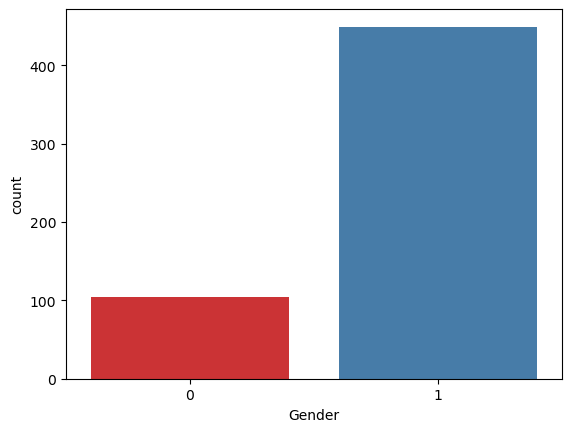

In [385]:
# Percentage of people of take loan by Gender

print("number of people who take loan as group by gender:")
print(data['Gender'].value_counts())

sns.countplot(x='Gender', data = data, palette = 'Set1')

number of people who take loan as group by marital status:
Married
1    359
0    194
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

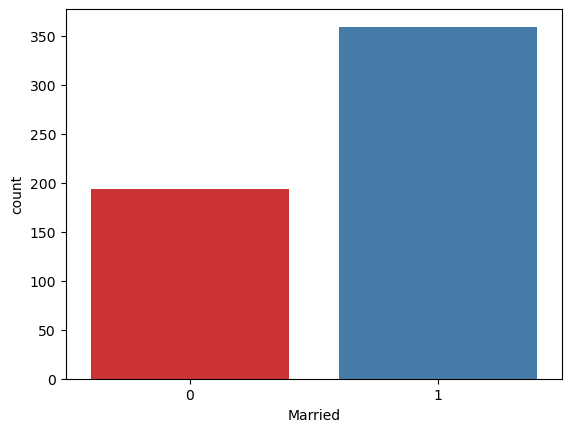

In [386]:
# Percentage of people of take loan by Marital Status

print("number of people who take loan as group by marital status:")
print(data['Married'].value_counts())

sns.countplot(x='Married', data = data, palette = 'Set1')

number of people who take loan as group by dependents:
Dependents
0    316
1     96
2     96
3     45
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

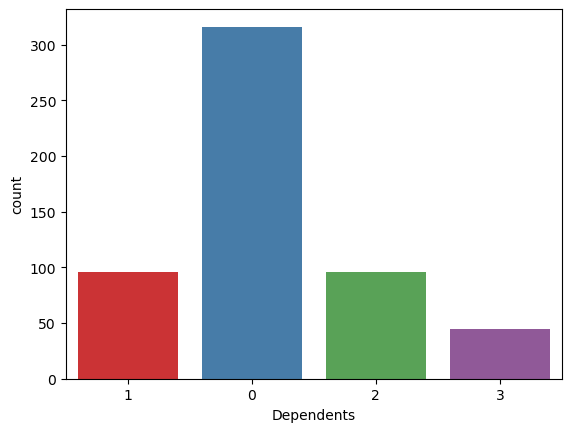

In [387]:
# Percentage of people of take loan by Dependents

print("number of people who take loan as group by dependents:")
print(data['Dependents'].value_counts())

sns.countplot(x='Dependents', data = data, palette = 'Set1')

number of people who take loan as group by Self Employed:
Self_Employed
0    481
1     72
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

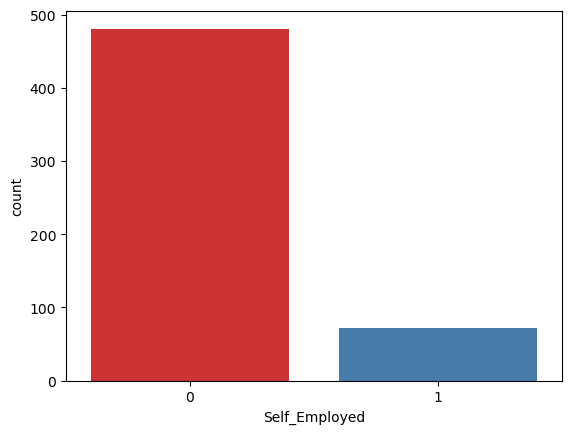

In [388]:
# Percentage of people of take loan by Self_Employed

print("number of people who take loan as group by Self Employed:")
print(data['Self_Employed'].value_counts())

sns.countplot(x='Self_Employed', data = data, palette = 'Set1')

number of people who take loan as group by Loan Amount:
LoanAmount
120.0    18
110.0    15
100.0    14
187.0    12
128.0    11
         ..
42.0      1
72.0      1
240.0     1
214.0     1
253.0     1
Name: count, Length: 199, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

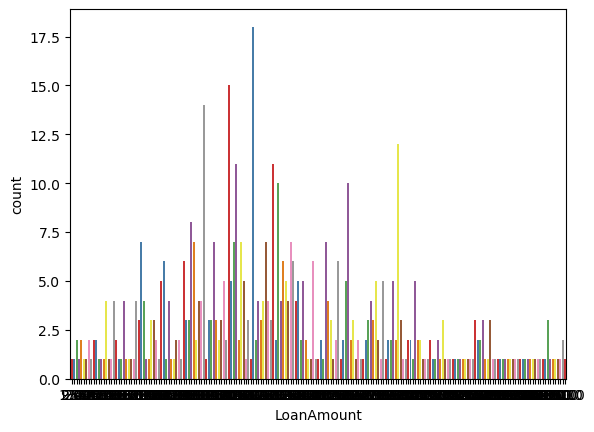

In [389]:
# Percentage of people of take loan by Loan_Amount

print("number of people who take loan as group by Loan Amount:")
print(data['LoanAmount'].value_counts())

sns.countplot(x='LoanAmount', data = data, palette = 'Set1')

number of people who take loan as group by Credit History:
Credit_History
1.0    482
0.0     71
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

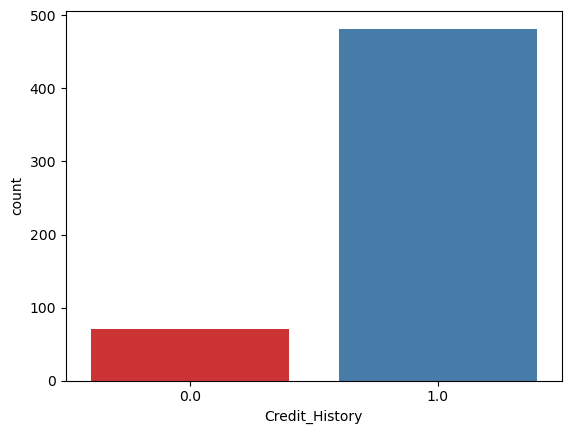

In [390]:
# Percentage of people of take loan by Credit History

print("number of people who take loan as group by Credit History:")
print(data['Credit_History'].value_counts())

sns.countplot(x='Credit_History', data = data, palette = 'Set1')

In [391]:
X = data.drop('Loan_Status', axis=1)

In [392]:
y = data['Loan_Status']

In [393]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [394]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [396]:
model_df = {}

def model_val(model,X,y):
    # spliting dataset for training and testing
    X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    
    # training the model
    model.fit(X_train, y_train)
    
    # asking model for prediction
    y_pred = model.predict(X_test)
    
    # checking model's prediction accuracy
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    # 5-fold cross-validation (but 10-fold cross-validation is common in practise)
    score = cross_val_score(model,X,y,cv=5)  # it will divides the dataset into 5 parts and during each iteration 
                                             # uses (4,1) combination for training and testing 
    
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model] = round(np.mean(score)*100,2)
    

### Logistic Regression


In [397]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# passing this model object of LogisticRegression Class in the function we've created
model_val(model,X,y)

c:\Users\92312\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() accuracy is 0.7927927927927928
LogisticRegression() Avg cross val score is 0.802981162981163


c:\Users\92312\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\92312\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [398]:
model_df

{LogisticRegression(): 80.3}

### Decision Tree Classifier

In [399]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7477477477477478
DecisionTreeClassifier() Avg cross val score is 0.7053398853398853


In [400]:
model_df

{LogisticRegression(): 80.3, DecisionTreeClassifier(): 70.53}

### SVC (Support Vector Classifier)

In [401]:
from sklearn import svm

model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.6936936936936937
SVC() Avg cross val score is 0.7016216216216217


In [402]:
model_df

{LogisticRegression(): 80.3, DecisionTreeClassifier(): 70.53, SVC(): 70.16}

### Random Forest Classifier

In [403]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7567567567567568
RandomForestClassifier() Avg cross val score is 0.7866502866502867


In [404]:
model_df

{LogisticRegression(): 80.3,
 DecisionTreeClassifier(): 70.53,
 SVC(): 70.16,
 RandomForestClassifier(): 78.67}

In [405]:
from sklearn.linear_model import LogisticRegression
import pickle


# Train the model
model = LogisticRegression()
model.fit(X, y)

# Save the model to a file using pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

c:\Users\92312\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [406]:

df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':0,
    'Education':1,
    'Self_Employed':0,
    'ApplicantIncome':5720,
    'CoapplicantIncome':0,
    'LoanAmount':110,
    'Loan_Amount_Term':360,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [407]:
result = model.predict(df)

In [408]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


In [409]:
test = pd.read_csv('loan-test.csv')
test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [410]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [411]:
test.isnull().sum()*100/len(test)

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [412]:
cols = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [413]:
test = test.dropna(subset=cols)

In [414]:
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [415]:
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [416]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [417]:
test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [418]:
test['Dependents'] = test['Dependents'].replace(to_replace="3+",value='3')

In [419]:
test = test.drop('Loan_ID' , axis=1)

In [420]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [421]:
test['Gender'] = test['Gender'].map({'Male':1,'Female':0}).astype('int')
test['Married'] = test['Married'].map({'Yes':1,'No':0}).astype('int')
test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
test['Property_Area'] = test['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')


In [422]:
with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [423]:
rslt = model.predict(test)

In [424]:
rslt

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,